# Business Data Analytics and Prediction

## Group #4 - Housing Prices


In [1]:
# Used for development stages
DEBUG_MODE = True

In [2]:
#Eilon - used for development stage - I need to set my working directory manually
EILON_SET_WORK_DIR = False
if (EILON_SET_WORK_DIR):
# Now change the directory
    import os
    os.chdir("C:/Users/bareilon/Documents/מסמכים/MBA/בינתחומי BIG DATA/Mini Semester 1/יסודות האנליזה העסקית/exercises/IDC-BDA-Exercises")

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Turn off warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### 1. Business objectives and targets

#### Business objective: 


### 2. Read, explore and prepare data

#### 2.1. Download and read the data

The dataset is taken from a Kagggle competition: <br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Read the csv file to a data frame. Note that the data is already split to train and test files.

In [5]:
df = pd.read_csv("Data/train.csv")

#### 2.2. Taking a quick look at the data 
Using the functions: 
* head
* info 
* describe


1. The prediction target (y) is the SalePrice column.
2. Data manipulation - we are going to drop all the categorical columns, as we don'tknow how to handle them yet.
3. We will handle some missing data

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#df.info()

In [8]:
df_train = pd.read_csv("Data/train.csv")
len_train = df_train.shape[0]
df_test = pd.read_csv("Data/test.csv")
df_train = df_train.drop("SalePrice", axis = 1)
df_merged = df_train.append(df_test)
df_merged.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
df_merged.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Fill in missing values

In [ ]:
# Find all columns with missing values

In [193]:
null_list = df_merged.isna().sum()
null_list[null_list > 0].sort_values(ascending=False)

MSZoning       4
Functional     2
Utilities      2
SaleType       1
KitchenQual    1
Electrical     1
Exterior2nd    1
Exterior1st    1
dtype: int64

### Variable: PoolQC
#### if the Pool Area is 0, the the Pool QC is 'NA', as described in the Data Description file

In [11]:
idx = (df_merged.PoolArea == 0) & (df_merged.PoolQC.isna() == True)
df_merged.loc[idx, 'PoolQC'] = df_merged.loc[idx, 'PoolQC'].fillna('NA')
#df_merged.loc[idx].head()

#### But we still have 3 outliers... Houses with pools but the qaulity is missing.

In [12]:
df_merged[(df_merged.PoolQC.isna() == True) & (df_merged.PoolArea > 0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
960,2421,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,...,0,368,NaN,GdPrv,NaN,0,2,2007,WD,Normal
1043,2504,50,RL,104.0,23920,Pave,NaN,Reg,Lvl,AllPub,...,0,444,NaN,NaN,NaN,0,4,2007,WD,Normal
1139,2600,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,AllPub,...,0,561,NaN,GdPrv,NaN,0,6,2007,WD,Normal


In [13]:
df_merged.PoolQC.value_counts()

NA    2906
Ex       4
Gd       4
Fa       2
Name: PoolQC, dtype: int64

Let's take a look at the data of the houses withe pools but no quality grading.
We'll review these features: Overall Condition, External Condition, Garage Condition, Heating Quality etc. 

In [14]:
qc_cols = ['OverallCond', 'ExterCond', 'ExterQual','GarageCond','GarageQual','HeatingQC','FireplaceQu','KitchenQual','BsmtFinType1','BsmtFinType2','Fence','PoolQC']
df_merged[qc_cols][(df_merged.PoolQC.isna() == True) & (df_merged.PoolArea > 0)]

,OverallCond,ExterCond,ExterQual,GarageCond,GarageQual,HeatingQC,FireplaceQu,KitchenQual,BsmtFinType1,BsmtFinType2,Fence,PoolQC
960,6,TA,TA,TA,TA,Gd,Fa,TA,BLQ,Rec,GdPrv,NaN
1043,5,TA,TA,TA,TA,Ex,Po,Gd,Unf,Unf,NaN,NaN
1139,5,TA,TA,TA,TA,Ex,NaN,TA,NaN,NaN,GdPrv,NaN


If there was a lot of data, we could build a model to predict this variable based on other qulity fators. 
Since there aren't enough houses with pools, we can assume the quality is Typical/Average (TA), basd on the other parameters. 

In [15]:
idx = (df_merged.PoolQC.isna() == True) & (df_merged.PoolArea > 0)
df_merged.loc[idx, 'PoolQC'] = df_merged.loc[idx, 'PoolQC'].fillna('TA')
df_merged.loc[idx]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
960,2421,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,...,0,368,TA,GdPrv,NaN,0,2,2007,WD,Normal
1043,2504,50,RL,104.0,23920,Pave,NaN,Reg,Lvl,AllPub,...,0,444,TA,NaN,NaN,0,4,2007,WD,Normal
1139,2600,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,AllPub,...,0,561,TA,GdPrv,NaN,0,6,2007,WD,Normal


In [16]:
df_merged.PoolQC.value_counts()

NA    2906
Ex       4
Gd       4
TA       3
Fa       2
Name: PoolQC, dtype: int64

In [17]:
df_merged.PoolQC.count()

2919

### 'MiscFeature' Column 

Let's overview the 'MiscFeature' column
According to the data description:
MiscFeature: Miscellaneous feature not covered in other categories

In [18]:
df_merged.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

We will fill in all the null values with 'NA'.

In [19]:
idx = df_merged.MiscFeature.isna()
df_merged.loc[idx, 'MiscFeature'] = df_merged.loc[idx, 'MiscFeature'].fillna('NA')
df_merged[idx].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NA,NaN,NA,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NA,NaN,NA,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NA,NaN,NA,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NA,NaN,NA,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NA,NaN,NA,0,12,2008,WD,Normal


But wait, let's check of there is a house with a Miscellaneous Value greater then 0 that we wrongly labeled 'MiscFeature' as 'NA'

In [20]:
idx = (df_merged.MiscFeature == 'NA') & (df_merged.MiscVal > 0)
df_merged[idx]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1089,2550,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,0,NA,NaN,NA,17000,10,2007,New,Partial


There i one house that we missslabeled. Without other info, we will set it to "Other"

In [21]:
df_merged.loc[idx, 'MiscFeature'] = 'Othr'
df_merged[idx]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1089,2550,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,0,NA,NaN,Othr,17000,10,2007,New,Partial


In [22]:
df_merged.MiscFeature.value_counts()

NA      2813
Shed      95
Othr       5
Gar2       5
TenC       1
Name: MiscFeature, dtype: int64

In [23]:
df_merged.MiscFeature.count()

2919

### Fence Column

In [24]:
df_merged.Fence.value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [25]:
idx = df_merged.Fence.isna()
df_merged.loc[idx, 'Fence'] = df_merged.loc[idx, 'Fence'].fillna('NA')
df_merged[idx].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,12,2008,WD,Normal


In [26]:
df_merged.Fence.value_counts()

NA       2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

#### Alley Column

In [27]:
df_merged.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [28]:
idx = df_merged.Alley.isna()
df_merged.loc[idx, 'Alley'] = df_merged.loc[idx, 'Alley'].fillna('NA')
df_merged[idx].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,12,2008,WD,Normal


In [29]:
df_merged.Alley.value_counts()

NA      2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

### 'FireplaceQu' Column

In [30]:
df_merged.FireplaceQu.value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [31]:
col = 'FireplaceQu'
idx = df_merged[col].isna()
df_merged.loc[idx, col] = df_merged.loc[idx, col].fillna('NA')
df_merged[idx].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal
10,11,20,RL,70.0,11200,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
12,13,20,RL,NaN,12968,Pave,NA,IR2,Lvl,AllPub,...,176,0,NA,NA,NA,0,9,2008,WD,Normal
15,16,45,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,GdPrv,NA,0,7,2007,WD,Normal


In [32]:
df_merged.FireplaceQu.value_counts()

NA    1420
Gd     744
TA     592
Fa      74
Po      46
Ex      43
Name: FireplaceQu, dtype: int64

Let's check if we miss labeled:

In [33]:
df_merged[(df_merged.Fireplaces > 0) & (df_merged.FireplaceQu == 'NA')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


we're good...

### Garage relaed columns

In [34]:
# Get all the columns related to Garages 
cols = df_merged.filter(regex='Garage').columns
cols = cols.values
cols

array(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond'], dtype=object)

In [35]:
# Find indexes of homes without garages
idx = df_merged[(df_merged.GarageType.isna()) & (df_merged.GarageYrBlt.isna()) & (df_merged.GarageFinish.isna()) & \
                (df_merged.GarageCars == 0)   & (df_merged.GarageArea == 0)    & (df_merged.GarageQual.isna())   & \
                (df_merged.GarageCond.isna()) ].index

In [36]:
# Fill in missing values
df_merged.loc[idx, 'GarageType'] = df_merged.loc[idx, 'GarageType'].fillna('NA')
df_merged.loc[idx, 'GarageFinish'] = df_merged.loc[idx, 'GarageFinish'].fillna('NA')
df_merged.loc[idx, 'GarageQual'] = df_merged.loc[idx, 'GarageQual'].fillna('NA')
df_merged.loc[idx, 'GarageCond'] = df_merged.loc[idx, 'GarageCond'].fillna('NA')
df_merged.loc[idx, 'GarageYrBlt'] = df_merged.loc[idx, 'GarageYrBlt'].fillna(-1)

In [37]:
null_list = df_merged[cols].isna().sum()
null_list[null_list > 0].sort_values(ascending=False)

GarageCond      2
GarageQual      2
GarageFinish    2
GarageYrBlt     2
GarageArea      1
GarageCars      1
dtype: int64

We still have a few rows with missing values ralted to Garages.

In [38]:
idx = ((df_merged.GarageCond.isna()) | (df_merged.GarageYrBlt.isna()) | (df_merged.GarageFinish.isna()) | \
                (df_merged.GarageQual.isna()) | (df_merged.GarageCond.isna()) | (df_merged.GarageYrBlt.isna()))

In [39]:
df_merged.loc[idx, cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Fill in the year the house was built
df_merged.loc[idx, 'GarageYrBlt'] = df_merged.loc[idx, 'YearBuilt']
df_merged.loc[idx,cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,1910.0,NaN,1.0,360.0,NaN,NaN
1116,Detchd,1923.0,NaN,NaN,NaN,NaN,NaN


Let's fill in the 'Finish' based on the most common value for 'Detached' Garages

In [41]:
df_merged.GarageFinish[df_merged.GarageType == 'Detchd'].value_counts()

Unf    719
RFn     34
Fin     24
Name: GarageFinish, dtype: int64

Since most 'Detached' Garages are 'Unf' (Unfinished), we will set the value to 'Unf'.

In [42]:
df_merged.loc[idx, 'GarageFinish'] = 'Unf'

In [43]:
df_merged.GarageArea[df_merged.GarageType == 'Detchd'].count()
df_merged.loc[idx,cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,1910.0,Unf,1.0,360.0,NaN,NaN
1116,Detchd,1923.0,Unf,NaN,NaN,NaN,NaN


We'll do the same for Garage Quality

In [44]:
df_merged.GarageQual[df_merged.GarageType == 'Detchd'].value_counts()

TA    667
Fa     97
Po      5
Gd      5
Ex      3
Name: GarageQual, dtype: int64

In [45]:
# We will use the most common quality for Detached Garages which is 'TA'
df_merged.loc[idx, 'GarageQual'] = 'TA'

And again for Garage Finish

In [46]:
# We will use the most common Condition for Detached Garages which is 'TA'
df_merged.loc[idx, 'GarageCond'] = 'TA'

In [47]:
df_merged.GarageCond[df_merged.GarageType == 'Detchd'].value_counts()

TA    694
Fa     67
Po     12
Gd      3
Ex      3
Name: GarageCond, dtype: int64

We still need to handle row id 1116.
Let's try to estimate the size of the Garage, based on the year the house was built.
We assume garages back then had some stadard size, and most families owned one car.

In [48]:
_min = 1920
_max = 1925
df_merged[(df_merged.GarageYrBlt > _min) & (df_merged.GarageYrBlt < _max)].shape[0]

28

In [49]:
df_merged['GarageCars'][(df_merged.GarageYrBlt > _min) & (df_merged.GarageYrBlt < _max)].mean()

1.1851851851851851

In [50]:
idx = 1116
garage_mean_area = df_merged['GarageArea'][(df_merged.GarageYrBlt > _min) & (df_merged.GarageYrBlt < _max) & (df_merged.GarageCars == 1)].mean()
df_merged.loc[idx, 'GarageCars'] = 1.0
df_merged.loc[idx, 'GarageArea'] = round(garage_mean_area)

### LotFrontage
It seems thic column is tricky. 
We can build a model to estimate the value 
as described in https://www.kaggle.com/sangxia/filling-in-the-missing-lotfrontage-values/notebook <br>
Let's examine the correlation between the 'SalePrice' and the 'LotFrontage' 

In [51]:
df_corr = df_merged[:len_train].copy()
df_corr['SalePrice'] = df.SalePrice.astype(int)
df_corr = df_corr[df_corr.LotFrontage > 0] 
df_corr = df_corr.loc[: ,['LotFrontage','SalePrice']]
df_corr.corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


There is a 35% correlation which is not too high, nor too low.
For now, we will fill in the Mean.

C:\Users\daphn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


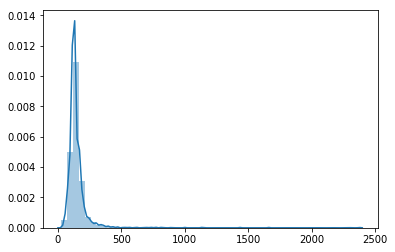

In [74]:
idx = df_merged.LotFrontage.notnull()
area_to_frontage = df_merged.loc[idx, 'LotArea'] / df_merged.loc[idx, 'LotFrontage'] 
area_to_frontage.mean()
sns.distplot(area_to_frontage)

In [75]:
idx = df_merged.LotFrontage.isna()
df_merged.loc[idx, 'LotFrontage'] =  df_merged.LotFrontage.mean()

### Basement Realted Columns
BsmtExposure    82 <br>
BsmtCond        82 <br>
BsmtQual        81 <br>
BsmtFinType2    80 <br>
BsmtFinType1    79 <br>

and we also have other related columns: <br>
TotalBsmtSF <br>
BsmtUnfSF <br>
BsmtFullBath <br>
BsmtHalfBath <br>

In [80]:
cols = df_merged.filter(regex='Bsmt').columns
cols = cols.values
cols

array(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'], dtype=object)

In [93]:
# Fill in 0 if the TotalBsmtSF is null
idx = df_merged.TotalBsmtSF.isna()
df_merged.loc[idx, 'TotalBsmtSF'] = df_merged.loc[idx, 'TotalBsmtSF'].fillna(0.0)

In [97]:
# Find indexes of rows with missing Basement parameters
idx = ((df_merged.BsmtQual.isna()) & (df_merged.BsmtCond.isna()) & (df_merged.BsmtExposure.isna()) & \
                (df_merged.BsmtFinType1.isna()) & (df_merged.BsmtFinType2.isna()))

In [100]:
df_merged.loc[idx, cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
182,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
259,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
342,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
362,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
371,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [109]:
idx = (df_merged.TotalBsmtSF == 0.0)
str_cols = ['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2']
df_merged.loc[idx, str_cols] = df_merged.loc[idx, str_cols].apply(lambda x: x.fillna('NA'), axis=0)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
39,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
90,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
102,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
156,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
182,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
259,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
342,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
362,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
371,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0


In [129]:
idx = ((df_merged.TotalBsmtSF == 0) & ((df_merged.BsmtUnfSF.isna()) | (df_merged.BsmtFullBath.isna()) | \
                (df_merged.BsmtHalfBath.isna())))
num_cols = ['BsmtFinSF1','BsmtFinSF2','BsmtHalfBath','BsmtFullBath', 'BsmtUnfSF']
df_merged.loc[idx, num_cols] = df_merged.loc[idx, num_cols].apply(lambda x: x.fillna(0), axis=0)

In [154]:
#df_merged[cols][df_merged.TotalBsmtSF == 0]
df_merged.loc[:,cols][df_merged.loc[:,cols].isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath


In [145]:
df_merged.BsmtQual.value_counts()
df_merged[df_merged.BsmtQual.isna()] = df_merged[df_merged.BsmtQual.isna()].fillna('TA')

In [148]:
df_merged.BsmtCond.value_counts()
df_merged[df_merged.BsmtCond.isna()] = df_merged[df_merged.BsmtCond.isna()].fillna('TA')

In [150]:
df_merged.BsmtExposure.value_counts()
df_merged[df_merged.BsmtExposure.isna()] = df_merged[df_merged.BsmtExposure.isna()].fillna('No')

In [153]:
df_merged.BsmtFinType2.value_counts()
df_merged[df_merged.BsmtFinType2.isna()] = df_merged[df_merged.BsmtFinType2.isna()].fillna('Unf')

In [165]:
mas_cols = ['MasVnrType', 'MasVnrArea']
df_merged[mas_cols][df_merged[mas_cols].isnull().any(axis=1)]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
231,NaN,NaN
246,NaN,NaN


In [164]:
df_merged.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [184]:
idx = ( (df_merged.MasVnrType.isna()) & (df_merged.MasVnrArea > 0.0) )
df_merged.loc[idx, 'MasVnrType'] = df_merged.loc[idx, 'MasVnrType'].fillna('BrkFace')

In [191]:
idx = ( (df_merged.MasVnrType.isna()) & (df_merged.MasVnrArea.isna()) )
df_merged.loc[idx, 'MasVnrType'] = df_merged.loc[idx, 'MasVnrType'].fillna('None')
df_merged.loc[idx, 'MasVnrArea'] = df_merged.loc[idx, 'MasVnrArea'].fillna(0.0)

# This is where I got
## --------------------------------------------

#### 2.3. Exploratory data analytics


Data exploration is required to understand what is your data, and which preparations are required on it. A common visualization is a histogram. Use histogram to understand the values distribution, because many statistical model assume normal distribution.

In [ ]:
if (not DEBUG_MODE):
    df_merged.hist(bins = 25, figsize = (20,15)) #Check the hist parameters by clicking on the Tab completion. 
    plt.show()

In [ ]:
if (not DEBUG_MODE):
    df_merged.LotArea[df['LotArea'] < 5000].hist(bins = 50, figsize = (10,5)) #Check the hist parameters by clicking on the Tab completion. 
    plt.show()

In [ ]:
if (not DEBUG_MODE):
    display(df_merged.isnull().sum(),df_merged.isna().sum())

#### 2.4. Data manipulations

After we looked at the data we can prepare it to analysis. 

From understanding the histograms, and talking with experts we might decide to drop or change columns, or to split the data by rows. 

For example: 

...

An option that we will take here to handle this is:
1. Take out the few rows and put them aside for separate handling
2. Drop this predictor from data

(Note that after the data manipulation you can rerun the describe or histogram above to see changes)

# Handle Missing Values

In [ ]:
#fill Inside lots LotFrontage = 0
#df_merged[df_merged.LotConfig == 'Inside' && df_merged.LotFrontage.isna()]
#df_merged[df_merged.LotFrontage.isna() df_merged.LotConfig == "Inside"]

In [ ]:
df_merged.Alley.value_counts()

In [ ]:
df_merged.Street.notna().count()

In [ ]:
df_merged[df_merged.Alley.notna()]

In [ ]:
df_merged.Street = df_merged.Street.fillna(0)
df_merged.Alley = df_merged.Alley.fillna(0, inplace=True)

In [ ]:
street_map = {'Grvl':1, 'Pave':2}  #Define the mapping as a dictionary
df_merged["Street"] =  df["Street"].map(street_map)

In [ ]:
alley_map = {'Grvl':1, 'Pave':2}  #Define the mapping as a dictionary
df_merged["Alley"] =  df["Alley"].map(alley_map)

In [ ]:
df_merged.head(30)

In [ ]:
# Drop all Categorical columns
drop_cols = df.select_dtypes(include='object').columns
df = df.drop(drop_cols, axis = 1)

# Drop these columns as they are missing values
df = df.drop(['Id', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis = 1)

Typically data scientists continue back and forth between diffrent data visualizations and manipulations, but for this exercise we will stop here. We will dive more to this on next lesson.

In [ ]:
df.describe()

#### 2.5. Categorical values

Data manipulations require also handling of categorical data, and transforming it to be numerical. In our example, 'work_accident' and 'sales' are categorical that already appear as numerical. However, 'sales' and 'salary' are categorical with non-numeric data. We will learn how to handle such variables on next lesson, for now, lets just remove these columns.

You can learn more on the drop function in pandas, in: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

#### 2.6. Transform the data to matrix of X and y, spliting to Train and Test

Let's now prepae to modeling:
1. Split between X the predictors and y the target
2. Turn from data frame to matrix
3. Split X and y to train data set and test data set, with matching indexes between X and y


In [ ]:
# 1. Split between X the predictors and y the target
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

# 2. Turn from data frame to matrix: no indexes, number only
X = X.values  # X is a matrix 
y = y.values  # y is a vector

# Our Housing Data is already split to Train and Test
X_train = X
y_train = y

The train_test_split is the first function we are using from sklearn.
Learn more about it function at: <br>
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 


sklearn handles numpy arrays, whereas until now we handled a dataframe.
Lets check that indeed we changed the type:

In [ ]:
print( 'df type is: ', type(df), '  and X_train type is: ', type(X_train))

### 3. Fit a model, learning

To fit a model means to train the selected model(s) on X_train and y_train.
Most of this course will be dedicated to modeling fit and evaluation.
Yet, the model fiting itself is very short in programming, because the models are already programed in sklearn.
The programming for fiting a model (learning) includes 2 commands:
1. Select a model
2. Fit command

#### 3.1 Select a model

In this example we will use a model of type tree, that is called decision tree.
We will first import it from sklearn. Note that there is a decision trees for regresssion and a diffrent one for classification.

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

#### 3.2 Fit the selected model
Training the model, using sklearn, is typically only one command.

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
train_score = reg.score(X=X_train, y=y_train) 
train_score

### 4. Model evaluation

Evaluating the model can also be done in one command.

We can evalute the model that was trained on train_x by its prediction of test_x compared to test_y in one command. On next lessons we will learn more evaluation methods, as usually decision is taken by combined evaluation scores.

As we can see the evaluation on test was very good. Yet, model score on train is much higher. This may indicate that we might be in an overfit to the train data set.

In [ ]:
# Prepare Test Data
df = pd.read_csv("Data/test.csv")

# Drop all Categorical columns
drop_cols = df.select_dtypes(include='object').columns
df = df.drop(drop_cols, axis = 1)

# Drop columns that are missing values
df = df.drop(['Id', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis = 1)
# fill in missing values
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

X_test = df.values

In [ ]:
# Prepare Test y vector
df = pd.read_csv("Data/sample_submission.csv")
df = df.drop('Id', axis = 1)

# Turn from data frame to matrix: no indexes, numbers only
y_test = df.values  # y is a vector

In [ ]:
test_score = reg.score(X=X_test, y=y_test)
test_score

In [ ]:
(train_score - test_score) * 100

# Second Model
### Gradient Boosting Regression


In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 10, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

### Train the model

In [ ]:
clf.fit(X_train, y_train)

### Evaluate

In [ ]:
train_score = clf.score(X_train ,y_train)
train_score

### Test the model

In [ ]:
test_score = clf.score(X_test ,y_test)
test_score

### 5. Predict / Deploy model
Now that we have a model that we are satisfied it we can run it on new data.

Let's look on 3 employees, lines 7, 8 and 9 from the test data as example for input.

In [ ]:
# df.columns

In [ ]:
example = X_test[7:10,]
example

In [ ]:
predicted_y = clf.predict(X=example)
predicted_y

In [ ]:
y_test[7:10,]

In [ ]:
y_pred = clf.predict(X_test)
y_pred

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
#plt.scatter(X_test , y_test,label = 'Test')
plt.scatter(y_test , y_pred,label = 'Predict')
plt.show

The prediction matched the actual

### 6. Communicate
Now that you have a good working model you need to communicate your results.

If this is a predict project, you may decide not to communicate details externaly, only your evaluation results.

You need to communicate how you got to the results, to customers on infer project, and internaly on predict project. 